In [1]:
!pip install category_encoders

You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#Import all the things

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.metrics import accuracy_score

# Create the Data Frames

In [47]:
X_df = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/train_features.csv')
X_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
y_df = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/train_labels.csv')
y_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [48]:
X_test_df= pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/test_features.csv')
X_test_df.head()

# Hold on to this one for later

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [7]:
X_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
X_df.isna().sum() #going to move forward with the NaN's for our baseline

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

# Find our baseline

In [9]:
y_df['status_group'].value_counts(normalize=True) #majority baseline is .543

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [10]:
y = y_df.drop(columns='id')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
        X_df, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44550, 40), (14850, 40), (44550, 1), (14850, 1))

In [13]:
majority_class = y_train.mode()
y_pred = np.full(shape=y_test.shape, fill_value=majority_class)

In [14]:
accuracy_score(y_test, y_pred) ##Baseline = majority class using all columns

0.5453198653198653

# Create first model

In [15]:
X = X_df.select_dtypes('number')
X = X.drop(columns='id')
X = scale(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44550, 9), (14850, 9), (44550, 1), (14850, 1))

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.55672278338945

In [18]:
X_test_sc = X_test_df.drop(columns='id')
X_test_sc = X_test_sc.select_dtypes('number')
X_test_sc = scale(X_test_sc)
#Testing with Test data
X_test_sc

array([[-0.12798429,  1.9504066 ,  0.18408659, ..., -0.2770127 ,
         0.28136694,  0.74932705],
       [-0.12798429,  1.32999082,  0.39217066, ..., -0.37911642,
         0.23725387,  0.73672887],
       [-0.12798429,  1.32708489,  0.10442199, ..., -0.37911642,
         0.65737833,  0.74722736],
       ...,
       [-0.12798429,  1.19486514,  0.1001475 , ..., -0.37911642,
         0.02719163,  0.74722736],
       [-0.12798429,  0.50034818,  0.20570873, ..., -0.37911642,
        -0.07783948,  0.74617751],
       [-0.12798429, -0.25083439,  0.10399411, ..., -0.2770127 ,
        -0.30890794,  0.74512766]])

In [19]:
y_pred = logreg.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass1 = ids.join(y_pred_df)

pass1.rename(columns={0:'status_group'}, 
                 inplace=True)

pass1.set_index('id')

pass1.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass1',index=False)


In [20]:
pass1.head() #Pass 1 gets a .55105, slightly better than our baseline

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


# Coefficients

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


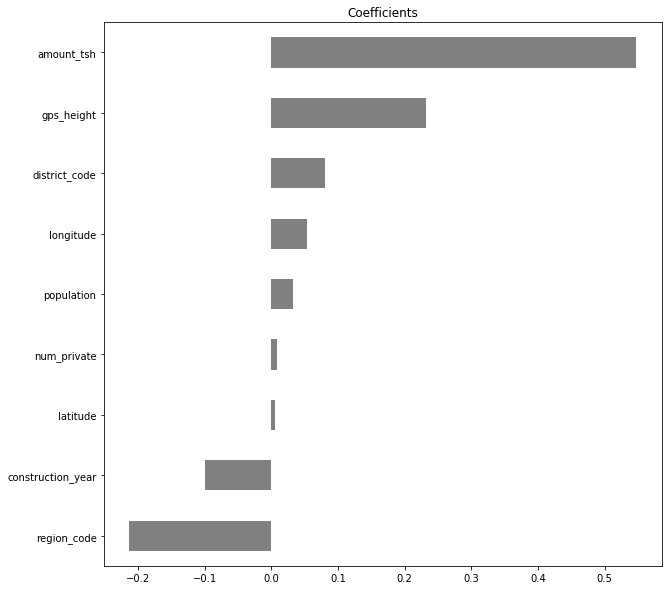

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('Coefficients')
new_X = X_df.drop(columns='id')

coefficients = logreg.fit(X_train, y_train).coef_[0]
feature_names = new_X.select_dtypes('number').columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

In [34]:
X_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [49]:
X_df = X_df.drop(columns='scheme_name') #Too many NaN's to be useful
X_test_df = X_test_df.drop(columns='scheme_name') #Too many NaN's to be useful

In [50]:
X_df['water_quality'] = X_df['water_quality'].replace('unknown', 'unknown_water_quality')
oh_wq = pd.get_dummies(X_df['water_quality'])
X_df = X_df.drop(columns ='water_quality')
X_df = X_df.join(oh_wq)

In [51]:
X_test_df['water_quality'] = X_test_df['water_quality'].replace('unknown', 'unknown_water_quality')
t_oh_wq = pd.get_dummies(X_test_df['water_quality'])
X_test_df = X_test_df.drop(columns ='water_quality')
X_test_df = X_test_df.join(t_oh_wq)

X_test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,waterpoint_type,waterpoint_type_group,coloured,fluoride,fluoride abandoned,milky,salty,salty abandoned,soft,unknown_water_quality
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,other,other,0,0,0,0,0,0,1,0
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,communal standpipe,communal standpipe,0,0,0,0,0,0,1,0
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,other,other,0,0,0,0,0,0,1,0
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,other,other,0,0,0,0,0,0,1,0
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,communal standpipe,communal standpipe,0,0,0,0,0,0,1,0


In [52]:
X_df['quantity'] = X_df['quantity'].replace('unknown', 'unknown_quantity')
oh_wq = pd.get_dummies(X_df['quantity'])
X_df = X_df.drop(columns ='quantity')
X_df = X_df.join(oh_wq)

X_test_df['quantity'] = X_test_df['quantity'].replace('unknown', 'unknown_quantity')
t_oh_wq = pd.get_dummies(X_test_df['quantity'])
X_test_df = X_test_df.drop(columns ='quantity')
X_test_df = X_test_df.join(t_oh_wq)

In [53]:
X_df['waterpoint_type_group'] = X_df['waterpoint_type_group'].replace('other', 'other_waterpoint_type_group')
oh_wq = pd.get_dummies(X_df['waterpoint_type_group'])
X_df = X_df.drop(columns ='waterpoint_type_group')
X_df = X_df.join(oh_wq)

X_test_df['waterpoint_type_group'] = X_test_df['waterpoint_type_group'].replace('other', 'other_waterpoint_type_group')
t_oh_wq = pd.get_dummies(X_test_df['waterpoint_type_group'])
X_test_df = X_test_df.drop(columns ='waterpoint_type_group')
X_test_df = X_test_df.join(t_oh_wq)

In [54]:
X_df['source_type'] = X_df['source_type'].replace('unknown', 'unknown_source_type')
X_df['source_type'] = X_df['source_type'].replace('dam', 'dam_source_type')
oh_st = pd.get_dummies(X_df['source_type'])
X_df = X_df.drop(columns ='source_type')
X_df = X_df.join(oh_st)

X_test_df['source_type'] = X_test_df['source_type'].replace('unknown', 'unknown_source_type')
X_test_df['source_type'] = X_test_df['source_type'].replace('dam', 'dam_source_type')
t_oh_wq = pd.get_dummies(X_test_df['source_type'])
X_test_df = X_test_df.drop(columns ='source_type')
X_test_df = X_test_df.join(t_oh_wq)

In [55]:
#PASS 2 with some one hot encoding columns

X = X_df.select_dtypes('number')
X = X.drop(columns='id')
X = scale(X)

X_test_sc = X_test_df.drop(columns='id')
X_test_sc = X_test_sc.select_dtypes('number')
X_test_sc = scale(X_test_sc)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test_sc.shape

((44550, 35), (14850, 35), (44550, 1), (14850, 1), (14358, 35))

In [57]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7001122334455668

In [58]:
y_pred = logreg.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass2 = ids.join(y_pred_df)

pass2.rename(columns={0:'status_group'}, 
                 inplace=True)

pass2.set_index('id')

pass2.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass2.csv',index=False)

## Pass 2 gets a .702

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


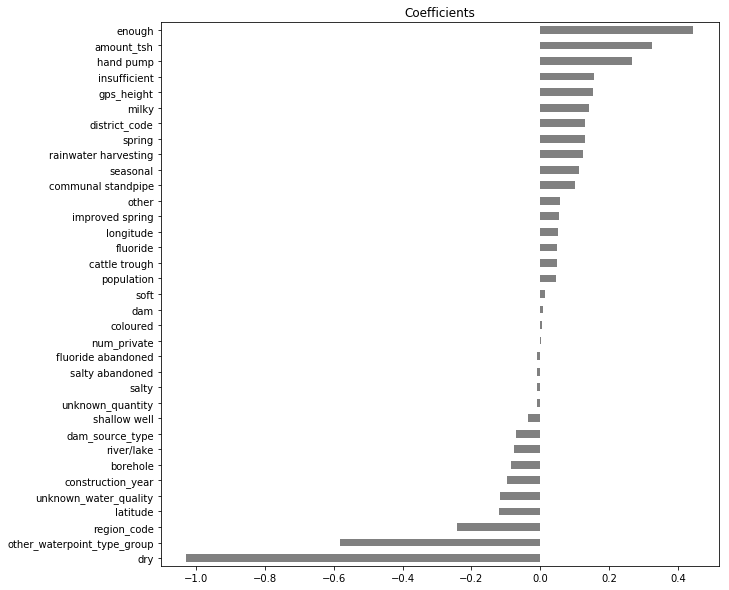

In [59]:
plt.figure(figsize=(10,10))
plt.title('Coefficients')
new_X = X_df.drop(columns='id')

coefficients = logreg.fit(X_train, y_train).coef_[0]
feature_names = new_X.select_dtypes('number').columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

# Creating pipeline with SelectKbest

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

pipe = make_pipeline( 
    SelectKBest(mutual_info_classif), 
    LogisticRegression()
)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'selectkbest__k': [10,20,30], 
    'logisticregression__class_weight': [None,'balanced'],
    'logisticregression__C': [.0001, .001, .01, .1, 1.0]
}

gs = GridSearchCV(pipe,param_grid=param_grid, cv=5,
                 scoring='accuracy')

gs.fit(X_train,y_train)

pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape